# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

class linear_regression:
  def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
  
  def fit(self, X, y):

        
    """
    Fit linear model.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training data
    y : array_like, shape (n_samples, n_targets)
        Target values.
    """
    
    features_array = np.array(X)
    
    global theta
    
    #final target values array 
    features_array1 = np.array(y)
    
    #length of the examples
    m = len(features_array1)
    number_of_ones = np.ones((m,1))
    
    #normalising the data
    for i in range(0,len(features_array[0])):
        features_array[:,i] = np.subtract(features_array[:,i],np.mean(features_array[:,i]))/np.std(features_array[:,i]) 
    
    
    #adding a extra coolumn for x0
    features_array = np.concatenate([number_of_ones,features_array],axis = 1)
    #there are 13 attributes, since we added a column to the data frame,we have to add 14*1 matrix suitable for mutiplication
    number_of_features = len(features_array[0])
    
    
    theta = np.zeros((number_of_features,1))
    
    L = []
    #print(theta)
    for i in range(self.iterations):
        
        #multiplying features_array with initial theta values to get the value of h
        
        h = np.dot( features_array,theta)
        
        
        # subtracting the matrices to get the matrix which depicts the error
        
        error = np.subtract(h,features_array1)
        
        # mutiplying the obtained error matrix with the partial derivative term 
        
        error = np.dot(features_array.T,error)
    
        #updating the theta values simultaneously
        
        theta = theta - ((self.learning_rate/m) * error)
        
    
    #defining cost function
    
    
    J_theta = (1/(2*m)) *  sum(np.square(np.subtract(np.dot(features_array,theta),features_array1)))
    
    print("Value of cost function:",J_theta)
    
    
    return theta,J_theta
        
    
  def predict(self, X):
    """Predict using the linear model
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.
    """
    testing_array = np.array(X)
    
    n = len(testing_array)
    
    #normalising the testing array 
    
    for i in range(0,len(testing_array[0])):
        
        testing_array[:,i] = np.subtract(testing_array[:,i],np.mean(testing_array[:,i]))/np.std(testing_array[:,i])
    
    number_of_ones_testing = np.ones((n,1))
    
    testing_array = np.concatenate([number_of_ones_testing,testing_array],axis = 1)
    
    predicted_values = np.dot(testing_array,theta)
    
    return predicted_values
    
    pass

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
boston = load_boston()
features = pd.DataFrame(boston.data,columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ['target'])
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.3)
creation = linear_regression(0.03,1000)
a = creation.fit(x_train,y_train)
print("Values of theta:",a[0])
print("alpha value is :",creation.learning_rate)
print("number of iterations is:",creation.iterations)
b = creation.predict(x_test)

print("predicted values array",b)


# Your code goes here

Value of cost function: [11.95689281]
Values of theta: [[22.93728814]
 [-0.79280092]
 [ 1.43942508]
 [ 0.45401705]
 [ 0.81052802]
 [-2.79130856]
 [ 2.47670631]
 [ 0.32801214]
 [-3.2802291 ]
 [ 3.09555183]
 [-1.80774431]
 [-1.98590708]
 [ 0.73877954]
 [-4.37114411]]
alpha value is : 0.03
number of iterations is: 1000
predicted values array [[21.576032  ]
 [30.89522786]
 [23.24615531]
 [21.41655195]
 [32.6273438 ]
 [25.3697053 ]
 [33.22900521]
 [22.50860266]
 [14.2862538 ]
 [21.86446469]
 [14.04597272]
 [21.60255268]
 [19.98240662]
 [20.13995647]
 [18.25077801]
 [14.32637982]
 [28.84047332]
 [28.38720286]
 [36.18007089]
 [14.48178977]
 [25.01054986]
 [22.384186  ]
 [25.47404765]
 [29.51759419]
 [35.33940748]
 [34.14679403]
 [21.7875049 ]
 [ 9.16534139]
 [37.21908958]
 [28.04064948]
 [18.49420222]
 [19.54619246]
 [25.36236218]
 [20.00551392]
 [20.09526372]
 [19.3385253 ]
 [24.98841794]
 [18.12311076]
 [31.02924686]
 [30.17643122]
 [20.66617513]
 [31.69290129]
 [25.68315982]
 [16.86003398]

## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston

import numpy as np

from itertools import combinations

from sklearn.model_selection import train_test_split

import pandas as pd

boston = load_boston()

features = pd.DataFrame(boston.data,columns = boston.feature_names)

target = pd.DataFrame(boston.target, columns = ['target'])

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.3)

creation1 = linear_regression(0.03,1000)

#first step try to generate all the 2 combinations features
x_train_array = np.array(x_train)

x_test_array = np.array(x_test)

y_train_array = np.array(y_train)

y_test_array = np.array(y_test)

L = []

A = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12]) #creating an array of 13 elements since the number of features is 13

#number of combinations to be considered

B = [2,3,4,5,6,7,8,9,10,11,12]

i = 0


while i<11:
    
    feature_combinations = np.array(list(combinations(A,B[i])))
    

    for j in range(len(feature_combinations)):
    
        x_train_temp = np.delete(x_train_array,feature_combinations[j],axis = 1)
    
        a1 = creation1.fit(x_train_temp,y_train)
    
        L.append([a1[1],feature_combinations[j]])
    
        x_train_temp = np.copy(x_train_array)
    
        print("the cost function of deleting ", B[i] ,"features is",a1[1])
        
    i = i + 1
    
    

    
#identifying the minimum cost function and determining which features made it happen
    
list_array = np.array(L)
    
min_value = min(list_array[:,0])
    
print("the minimum cost function is,", min_value)

item = numpy.where(list_array == min_value)

print("this is the tuple which identifies that set of variables which on deleting gives a minimum cost function",item)


#print("...............................................................................................")
    
#similarly we have to repeat the procedure for 3 combinations, 4 combinations, 5 combinations and so on

#three_feature_combinations = np.array(list(combinations(A,B[1])))

#for i in range(len(three_feature_combinations)):
    
    #x_train_temp = np.delete(x_train_array, three_feature_combinations[i],axis = 1)
    
    #a1 = creation1.fit(x_train_temp,y_train)
    
    #L.append([a1[1],three_feature_combinations[i]])
    
    #print("the cost function on deleting 3 variables is ",three_feature_combinations[i]," is ",a1[1])
    
    #x_train_temp = np.copy(x_train)
    
#print("..........................................................................")
    
#four_feature_combinations = np.array(list(combinations(A,B[3])))

#for i in range(len(four_feature_combinations)):
    
    #x_train_temp = np.delete(x_train_array,four_feature_combinations[i],axis = 1)
    
    #a1 = creation1.fit(x_train_temp,y_train)
    
   # L.append([a1[1],four_feature_combinations[i]])
    
    #print("the cost function on deleting 4 variables is ",four_feature_combinations[i]," is ",a1[1])
    
    #x_train_temp = np.copy(x_train)


# Your code goes here

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

Value of coefficient a is -1
Value of coefficient b is  2
 value of coefficient c is  -5


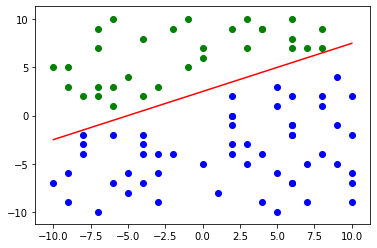

In [ ]:
import matplotlib.pyplot as plt
from random import *
import numpy as np

def generate_dataset(k0, k1):
    
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """
    
    #generating the 3 numbers required randomly
    
    a = randint(-10,10) 
    print("Value of coefficient a is",a)
    b = randint(-10,10)
    print("Value of coefficient b is ",b)
    c = randint(-10,10)
    print(" value of coefficient c is ",c)
    L = []
    L1 = []
    
    for i in range(100):
    
        x = randint(-10,10)
        y = randint(-10,10)
        if a * x + b *  y + c < 0 :
            L.append([x,y])
            plt.scatter(x,y,c = 'b')
        else:
            L1.append([x,y])

    for i in range(100):
    
        x = randint(-10,10)
        
        y = randint(-10,10)
        
        if a * x + b *  y + c > 0 :
            
            L1.append([x,y])
            
            plt.scatter(x,y,c = 'g')
            
        else:
            
            L.append([x,y])
            
    straight_line = np.linspace(-10,10,10)
    
    straight_line_updated = (a*straight_line+c)/(-1*b)
    
    plt.plot(straight_line,straight_line_updated,'-r')
    
    plt.show()
    
    pass

generate_dataset(100,100)

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a ${w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



In [ ]:

import numpy as np
def fit_line(X, y):
    
    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)
    
    Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    #using X.shape to determine the number of rows and columns
    
    m, d = X.shape 
    
    #adding column of 1's to the X data
    
    number_of_ones = np.ones((m,1))
    
    X = np.concatenate([number_of_ones,X],axis = 1)
    
    #randomnly choosing the value
    w = np.random.randint(-10,10,(1,d+1))
    iters = 1000
    
    L1 = []
    
    for _ in range(iters):
        
        #To randomly take a sample without replacement
        
        idx = np.random.randint(m)
        
        if idx in L1:
            
            idx = np.random.randint(m)
        
        L1.append(idx)
        
        x_rows = X[idx,:]
        #extracting the labels vector
        y_labels = y[idx]
        w_ = w.T
        Y = np.dot(X[idx,:],w_)
        if Y>=0 and y_labels ==-1 or Y<0 and y_labels ==1:
            
            w = w + y_labels * x_rows
    
    return w
    
    pass

fit_line(X,y)

[[-13.  22. -14.]]


### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: The above algorithm converges for a linearly seperable data for the fact that as we update the weights value for missclassified points and run it through a iteration. The weights of the mis-classified points gets updated itself and it tends to converge towards the straight line to pass on to the opposite side of the line. converging refers to the fact that the cost function values tend to move towards the mminimum of the curve in order to reduce the cost function. In other words the output tends to get closer and closer to a particular point. Sometimes the algorithm may diverge, where the ouput might move away and away from a particular value. In above the mis-classified points  tends to move towards the line when its weight are updated and its converging

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: When the data is not linearly seperable the points cannot be classified into different classes using a straight line. That means a straight line is not sufficient enough to divide the samples into 2 different classes and the samples doesnt get classified properly by that straight line. When the data is not linearly seperable, We can salvage the situation as follows: We can map the original function to a higher dimensional function and  then involves finding a linearly seperable hyperplane in the new space. We can convert the orginal data into a quadratic or higher degree polynomial data. 